<a href="https://colab.research.google.com/github/sathyapramodks/IMDB_DA/blob/master/IMDB_chord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
df.head

<bound method NDFrame.head of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of man

In [4]:
Genre = df['Genre'].str.split(',', expand = True)

In [5]:
Genre

,0,1,2
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy
...,...,...,...
995,Crime,Drama,Mystery
996,Horror,None,None
997,Drama,Music,Romance
998,Adventure,Comedy,None


In [6]:
Genre.rename(columns={0:"Genre1", 1:'Genre2', 2:'Genre3'}, inplace=True)

In [7]:
Genre

,Genre1,Genre2,Genre3
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy
...,...,...,...
995,Crime,Drama,Mystery
996,Horror,None,None
997,Drama,Music,Romance
998,Adventure,Comedy,None


In [8]:
Covariance_mat = pd.crosstab(index = Genre['Genre1'], columns = Genre['Genre2'])

In [9]:
print(Covariance_mat.index, Covariance_mat.index.size)
print(Covariance_mat.columns, Covariance_mat.columns.size)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller'],
      dtype='object', name='Genre1') 13
Index(['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='Genre2') 19


In [10]:
missing  = 0
for i in Covariance_mat.columns:
  if i not in Covariance_mat.index:
    missing += 1

In [11]:
missing

7

Trial section


In [12]:
Covariance_mat_2 = pd.crosstab(index = Genre['Genre3'], columns = Genre['Genre2'])

In [13]:
print(Covariance_mat_2.index, Covariance_mat_2.index.size)
print(Covariance_mat_2.columns, Covariance_mat_2.columns.size)

Index(['Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='Genre3') 18
Index(['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller'],
      dtype='object', name='Genre2') 16


End of trial


In [14]:
Covariance_mat_2.drop(['Action'], axis = 1, inplace = True)

In [15]:
Covariance_mat_2

Genre2,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller
Genre3,,,,,,,,,,,,,,,
Adventure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Biography,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Comedy,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Crime,6,2,13,0,0,0,0,0,0,0,0,0,0,0,0
Drama,18,12,17,33,0,0,0,0,0,0,0,0,0,0,0
Family,6,0,8,0,10,0,0,0,0,0,0,0,0,0,0
Fantasy,27,0,4,1,13,17,0,0,0,0,0,0,0,0,0
History,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0
Horror,2,0,3,0,7,0,12,0,0,0,0,0,0,0,0


In [16]:
print(Covariance_mat_2.index, Covariance_mat_2.index.size)
print(Covariance_mat_2.columns, Covariance_mat_2.columns.size)

Index(['Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='Genre3') 18
Index(['Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller'],
      dtype='object', name='Genre2') 15


In [18]:
Covariance_mat_2['Sport'] = [1,2,5,6,1,0,1,2,3,0,1,4,5,6,1,0,2,3]
Covariance_mat_2['War'] = [1,2,5,6,1,0,1,2,3,0,1,4,5,6,1,0,2,3]
Covariance_mat_2['Western'] = [1,2,5,6,1,0,1,2,3,0,1,4,5,6,1,0,2,3]

In [19]:
print(Covariance_mat_2.index, Covariance_mat_2.index.size)
print(Covariance_mat_2.columns, Covariance_mat_2.columns.size)

Index(['Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='Genre3') 18
Index(['Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'Sport', 'War', 'Western'],
      dtype='object', name='Genre2') 18


In [20]:
Covariance_mat_2.sort_index(axis=1, inplace = True)

In [21]:
print(Covariance_mat_2.index, Covariance_mat_2.index.size)
print(Covariance_mat_2.columns, Covariance_mat_2.columns.size)

Index(['Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='Genre3') 18
Index(['Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='Genre2') 18


In [22]:
missing  = 0
for i in Covariance_mat_2.columns:
  if i not in Covariance_mat_2.index:
    missing += 1

In [23]:
missing

0

In [24]:
newdf = Covariance_mat_2.copy()

In [25]:
newdf

Genre2,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Genre3,,,,,,,,,,,,,,,,,,
Adventure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
Biography,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2
Comedy,41,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,5,5
Crime,6,2,13,0,0,0,0,0,0,0,0,0,0,0,6,0,6,6
Drama,18,12,17,33,0,0,0,0,0,0,0,0,0,0,1,0,1,1
Family,6,0,8,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0
Fantasy,27,0,4,1,13,17,0,0,0,0,0,0,0,0,1,0,1,1
History,0,0,0,0,21,0,0,0,0,0,0,0,0,0,2,0,2,2
Horror,2,0,3,0,7,0,12,0,0,0,0,0,0,0,3,0,3,3


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

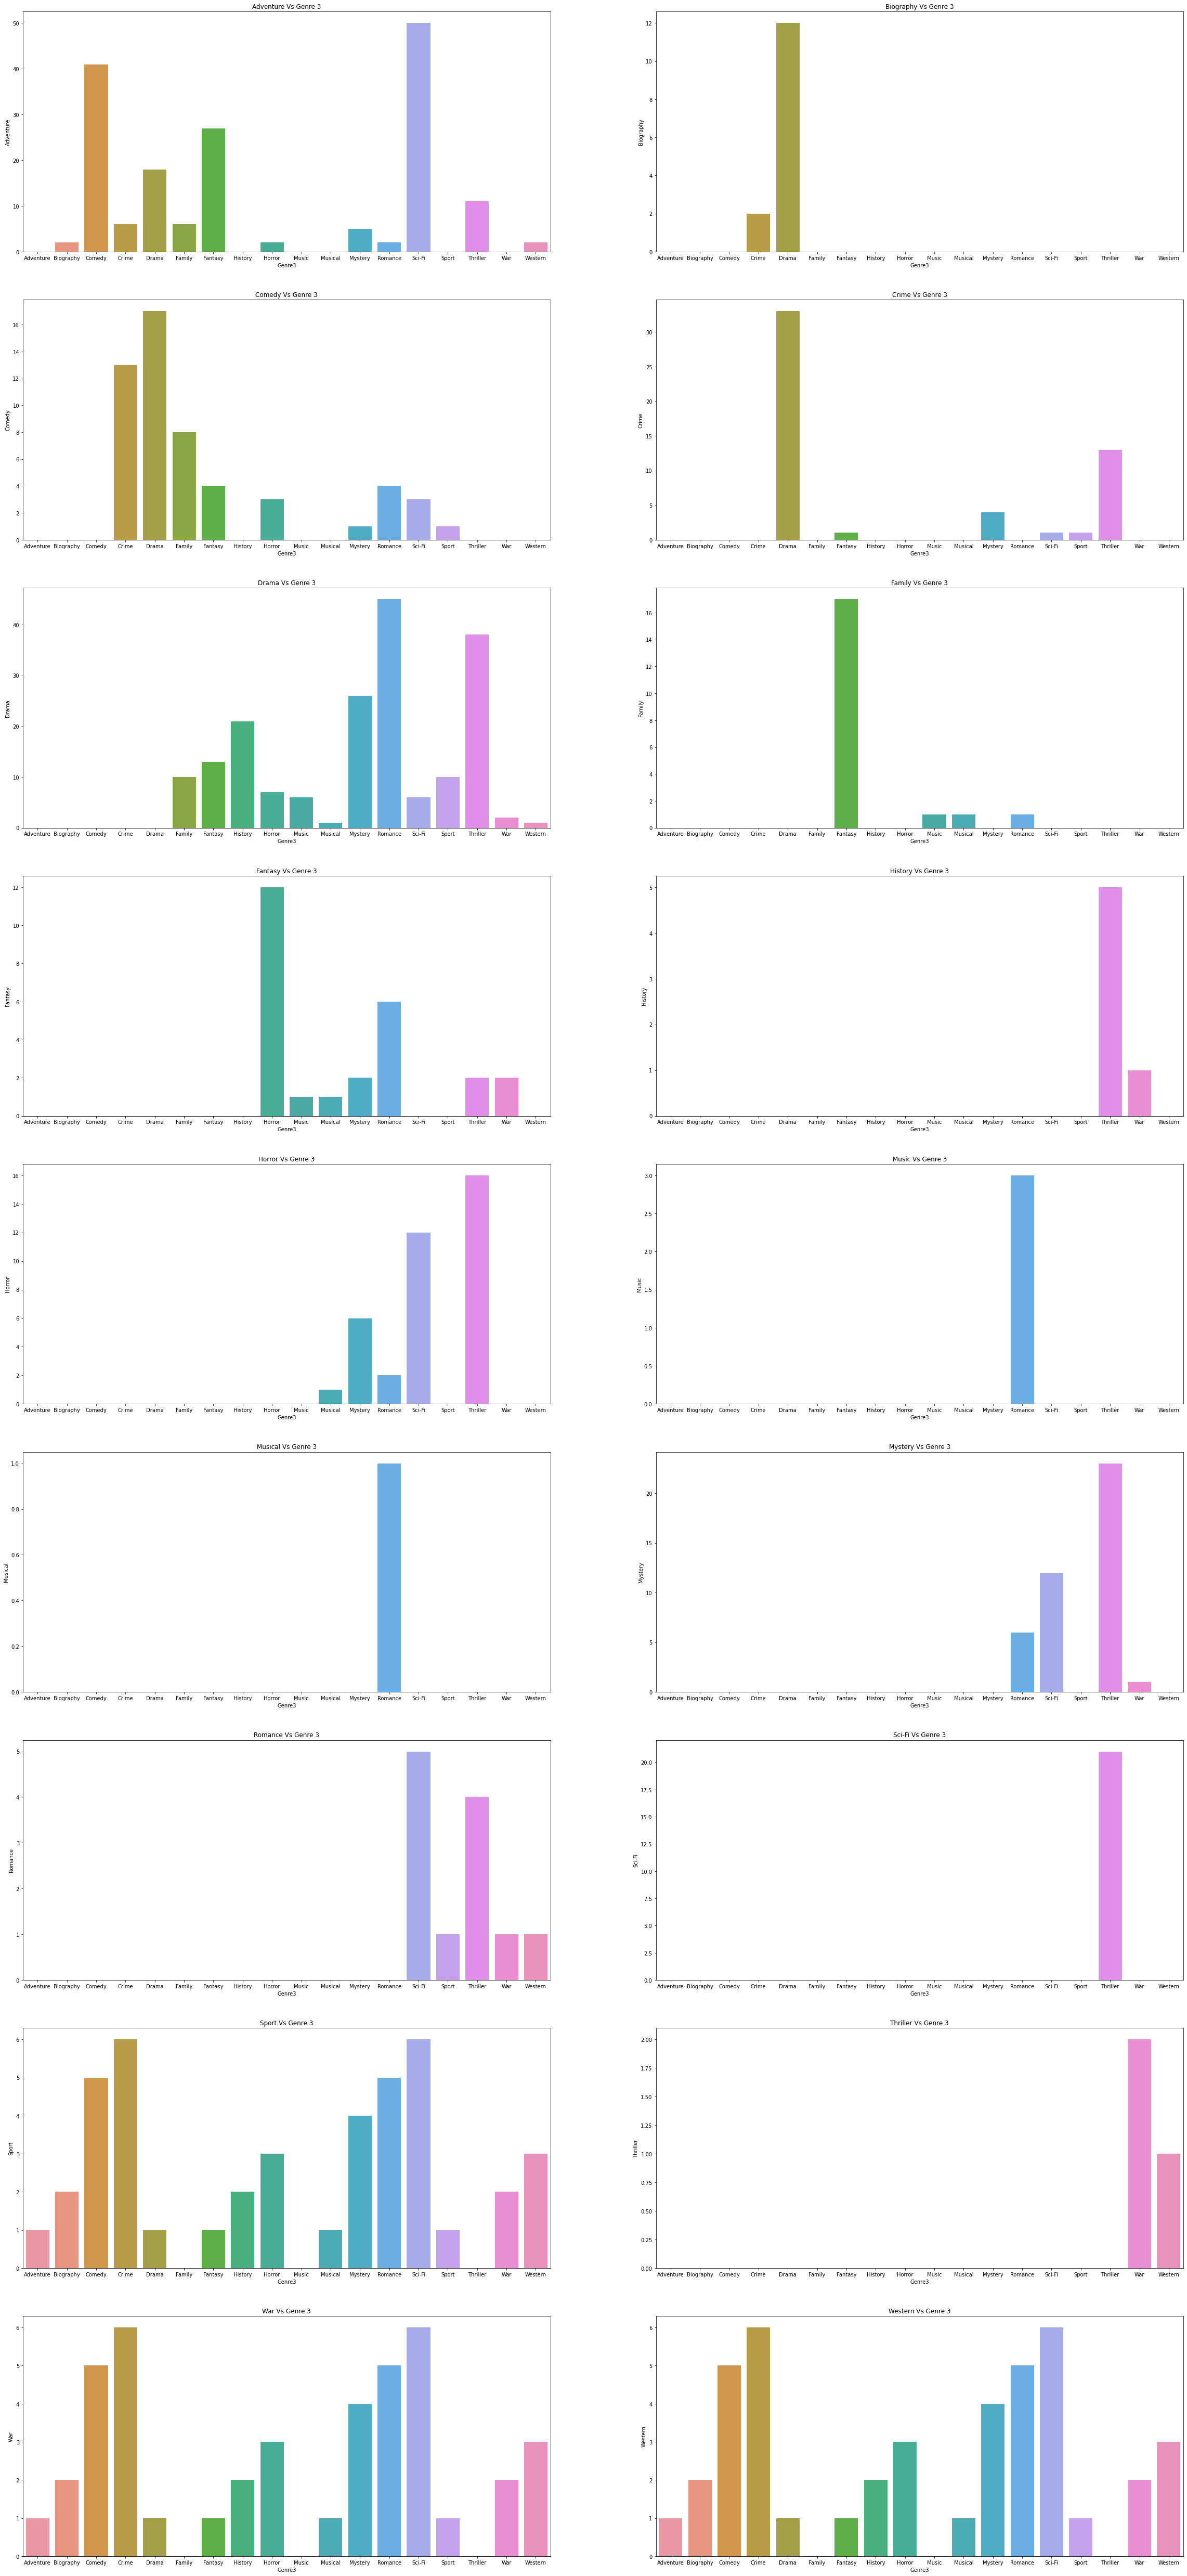

In [27]:
plt.figure(figsize=(40,90))
j = 1
for i in newdf.columns:
  plt.subplot(9,2,j)
  sns.barplot(x = newdf.index, y = newdf[i]).set(title = i + ' Vs Genre 3')
  j = j+1

In [28]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

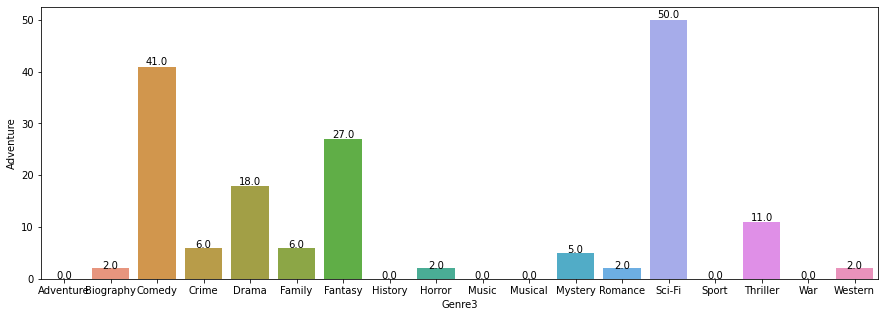

In [29]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x = newdf.index, y = newdf['Adventure'])
show_values(ax)

#Gorup plot with data lables

x = Genre 3, Y = each value of Genre 2

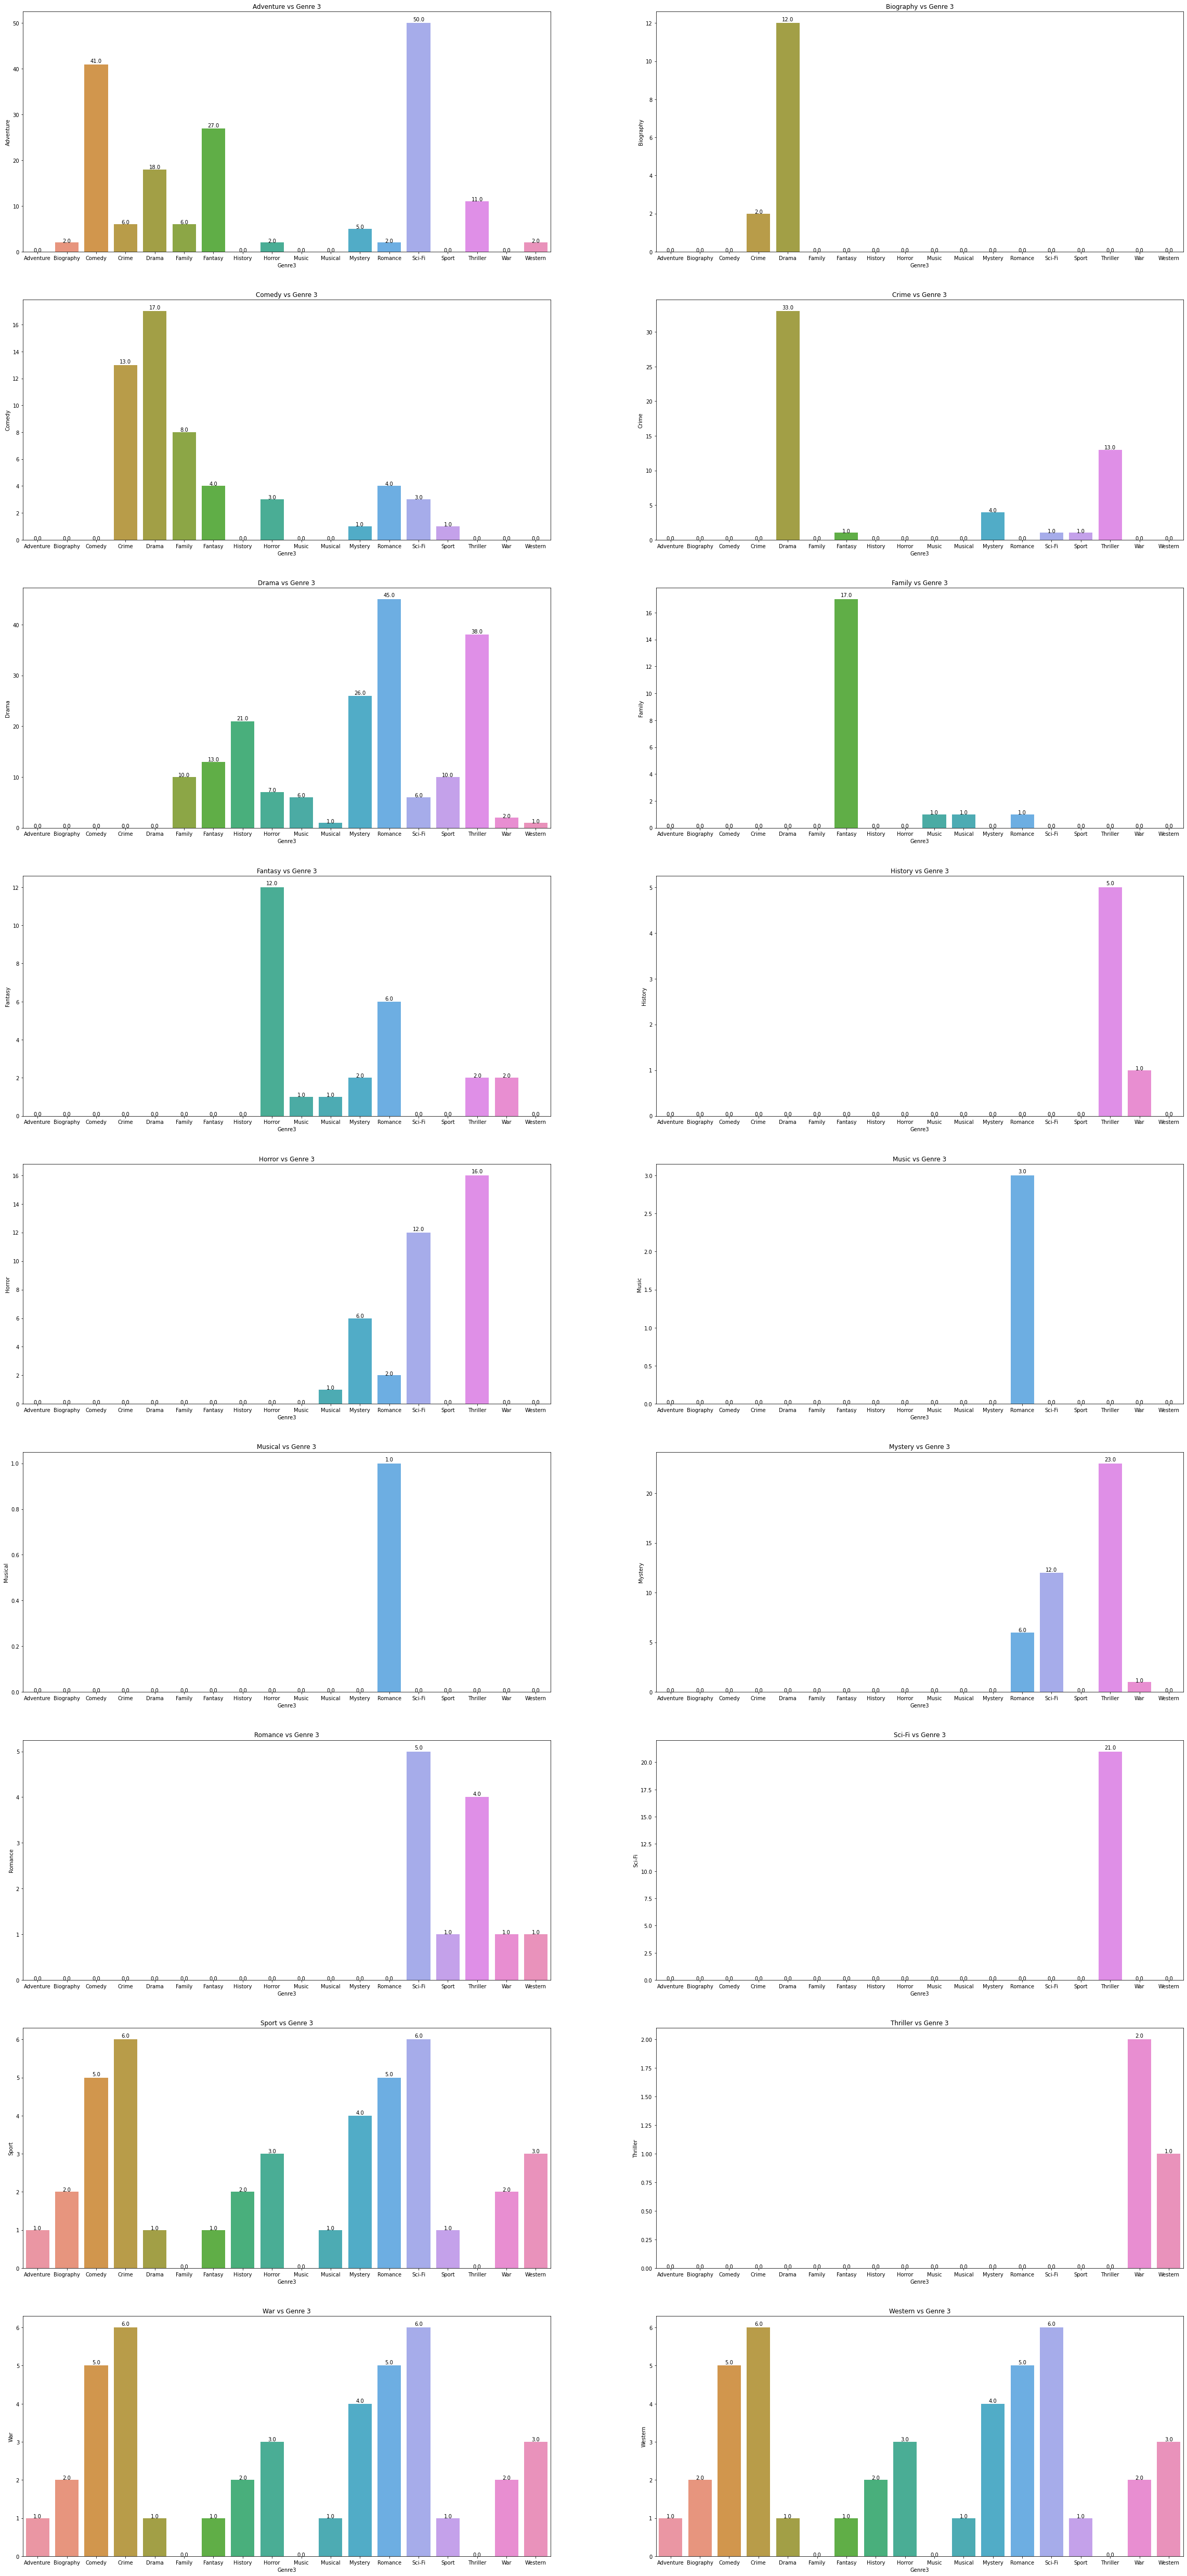

In [30]:
plt.figure(figsize=(40,90))
j = 1
for i in newdf.columns:
  plt.subplot(9,2,j)
  a = sns.barplot(x = newdf.index, y = newdf[i])
  a.set(title = i + ' vs Genre 3')
  show_values(a)
  j = j+1

x = Genre 2, y = Each value of genre 3


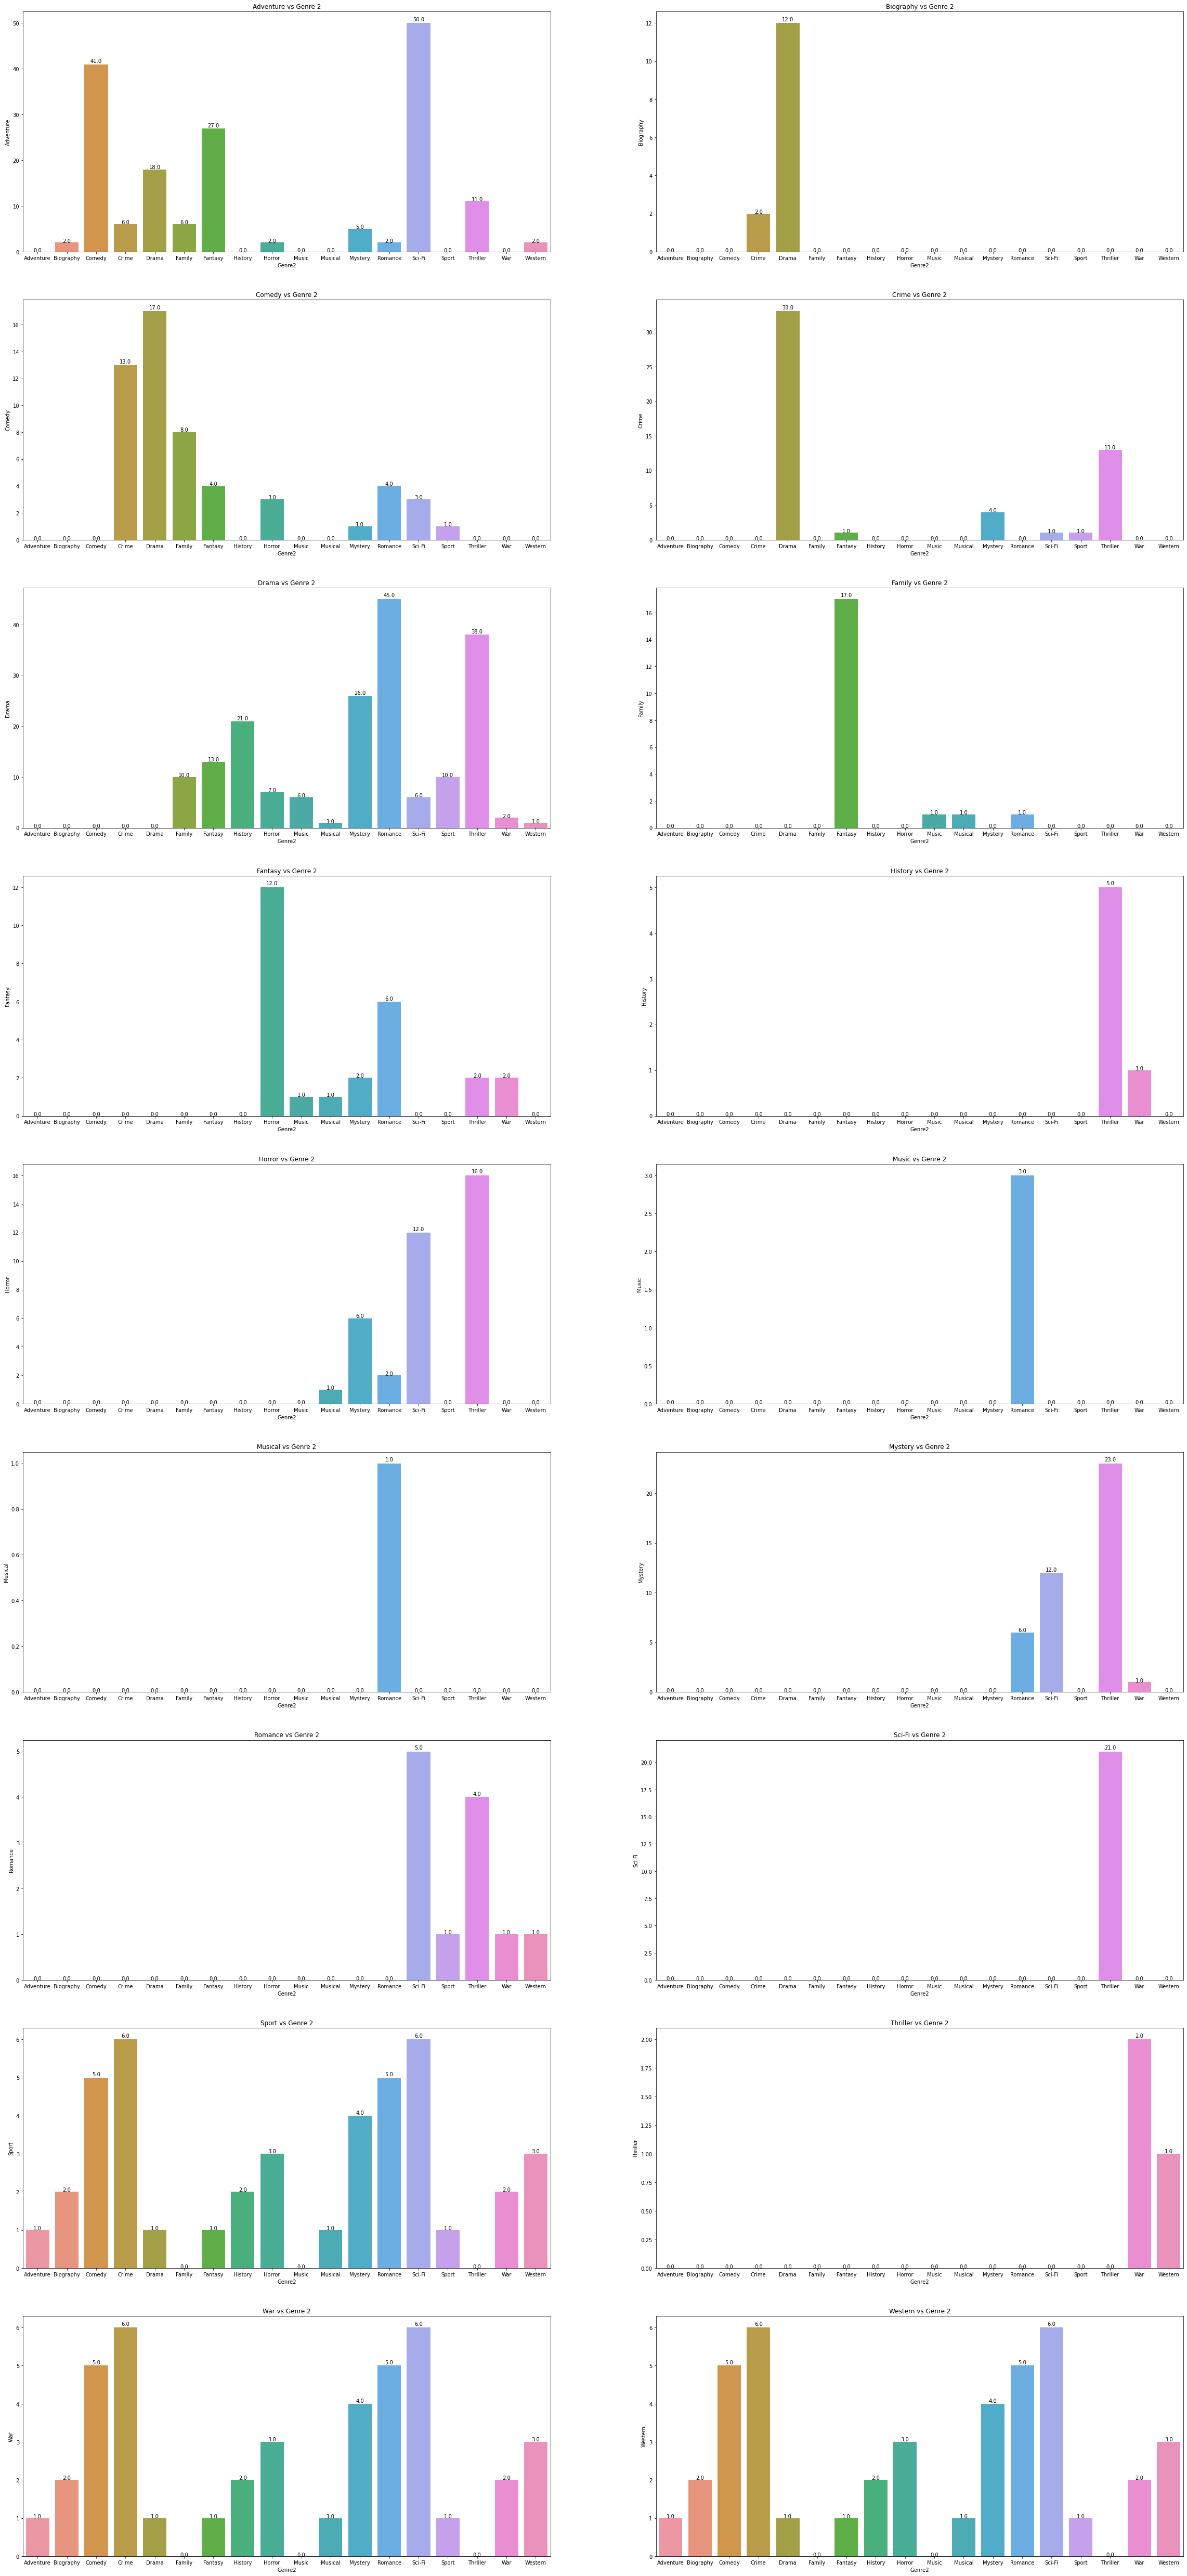

In [31]:
plt.figure(figsize=(40,90))
j = 1
for i in newdf.index:
  plt.subplot(9,2,j)
  a = sns.barplot(x = newdf.columns, y = newdf[i])
  a.set(title = i + ' vs Genre 2')
  show_values(a)
  j = j+1

In [32]:
a

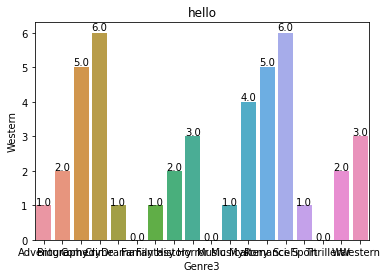

In [33]:
a = sns.barplot(x = newdf.index, y = newdf[i])
a.set(title = "hello")
show_values(a)

In [34]:
a

In [35]:
!pip install chord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
